In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/heart_pca.csv")

# Separate features and target
X = df.drop(columns=["target"])   # all columns except target
y = df["target"]                  # target column

# **Feature Selection**
## 1. Use Feature Importance 

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Malak.Ossama\AppData\Local\Temp\ipykernel_15000\2773965790.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importances, palette="viridis")


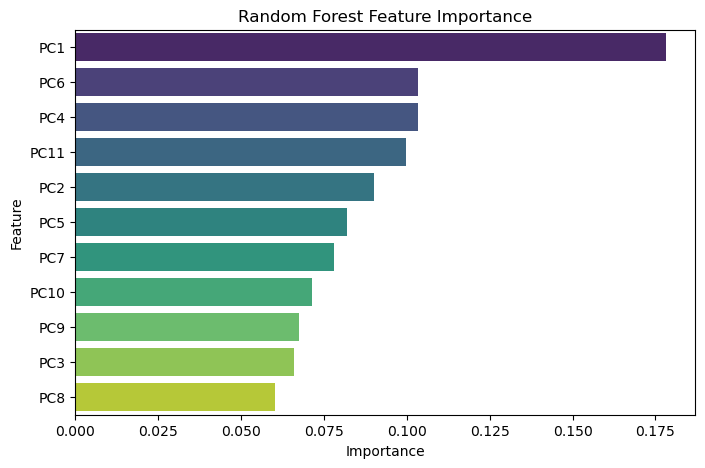

In [20]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

rf_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=rf_importances, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.show()

In [23]:
from xgboost import XGBClassifier
from xgboost import plot_importance

C:\Users\Malak.Ossama\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Malak.Ossama\AppData\Local\Temp\ipykernel_15000\276177195.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importances, palette="plasma")


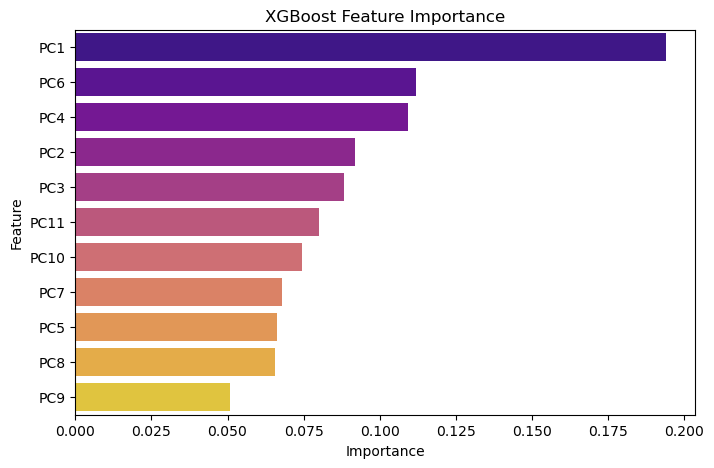

In [24]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X, y)

xgb_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=xgb_importances, palette="plasma")
plt.title("XGBoost Feature Importance")
plt.show()

## 2. Apply RFE

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2

In [29]:
# Use Logistic Regression as estimator
log_reg = LogisticRegression(max_iter=2000, solver="liblinear")

# Select top 5 features (you can change k)
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X, y)

rfe_results = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

print("RFE Results:")
print(rfe_results)

RFE Results:
   Feature  Selected  Ranking
0      PC1      True        1
3      PC4      True        1
6      PC7      True        1
5      PC6      True        1
7      PC8      True        1
10    PC11     False        2
1      PC2     False        3
2      PC3     False        4
9     PC10     False        5
4      PC5     False        6
8      PC9     False        7


## 3. Use Chi-Square Test 

In [31]:
from sklearn.preprocessing import MinMaxScaler

C:\Users\Malak.Ossama\AppData\Local\Temp\ipykernel_15000\2273298239.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Chi2 Score", y="Feature", data=chi2_scores, palette="magma")


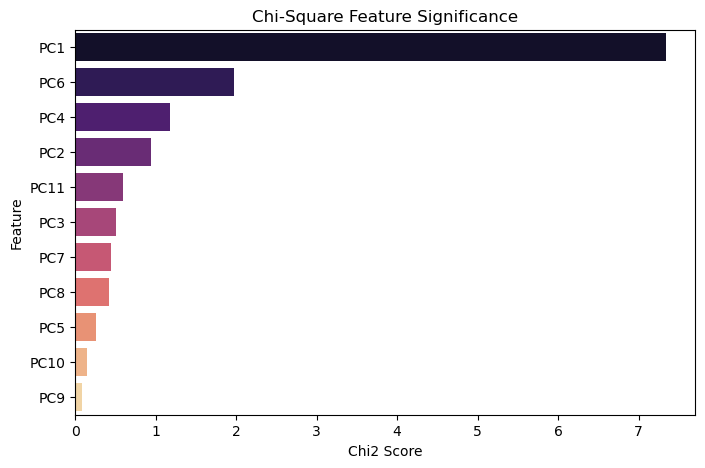

In [32]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k="all")  # test all features
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Chi2 Score", y="Feature", data=chi2_scores, palette="magma")
plt.title("Chi-Square Feature Significance")
plt.show()

## 4. Select only mostrelevant features

In [33]:
all_scores = pd.DataFrame({
    "Feature": X.columns,
    "RF Importance": rf.feature_importances_,
    "XGB Importance": xgb.feature_importances_,
    "RFE Selected": rfe.support_,
    "Chi2 Score": chi2_selector.scores_
})

all_scores = all_scores.sort_values(by="RF Importance", ascending=False)
print(all_scores)

   Feature  RF Importance  XGB Importance  RFE Selected  Chi2 Score
0      PC1       0.178109        0.193884          True    7.336328
5      PC6       0.103400        0.111918          True    1.968174
3      PC4       0.103290        0.109319          True    1.178710
10    PC11       0.099831        0.080130         False    0.588302
1      PC2       0.090005        0.091890         False    0.942686
4      PC5       0.081812        0.066117         False    0.260777
6      PC7       0.078047        0.067810          True    0.437648
9     PC10       0.071509        0.074543         False    0.141884
8      PC9       0.067549        0.050661         False    0.088187
2      PC3       0.066061        0.088240         False    0.508552
7      PC8       0.060387        0.065487          True    0.416106


In [39]:
# # Final selected features (strict rule = top 3; lenient = top 5)
# selected_features_strict = ["PC1", "PC6", "PC4", "PC7", "PC8"]
# selected_features_lenient = ["PC1", "PC6", "PC4", "PC7", "PC8"]

# # Build reduced dataset (choose one option)
# df_final = df[selected_features_strict + ["target"]]  # strict
# # df_final = df[selected_features_lenient + ["target"]]  # lenient

# df_final.to_csv("../data/heart_selected.csv", index=False)
# print("Final dataset shape:", df_final.shape)

In [52]:
# Final selected features 
selected_features_super = ["PC1", "PC4", "PC6"]
selected_features_unsuper = ["PC1"]

# Build reduced dataset (choose one option)
df_final_super = df[selected_features_super + ["target"]]  
df_final_unsuper = df[selected_features_unsuper + ["target"]]  

df_final_super.to_csv("../data/heart_selected_super.csv", index=False)
print("Final Super dataset shape:", df_final_super.shape)

df_final_unsuper.to_csv("../data/heart_selected_unsuper.csv", index=False)
print("Final Unsuper dataset shape:", df_final_unsuper.shape)

Final Super dataset shape: (283, 4)
Final Unsuper dataset shape: (283, 2)
